# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
!pip install --upgrade jupyter
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 631.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [5]:
# Define transforms
## YOUR CODE HERE ##
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(28),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
###

test_transforms = transforms.Compose([
    transforms.Resize(28),
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=test_transforms)

train_size = int(0.8 * len(train_data))
valid_size = len(train_data) - train_size
train_data, valid_data = torch.utils.data.random_split(train_data, [train_size, valid_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5434903.29it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 157544.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1287269.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9352247.80it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Preprocessing Steps

1. **Flattening**: The input images in the MNIST dataset are 28x28 pixels. Before feeding them into a neural network, we flatten each image into a 1D tensor of size 784 (28 * 28) pixels. This step ensures that each image is represented as a single vector, which is easier to process for the neural network.

2. **Augmentations (for Training Set)**:
   - **Random Rotation**: Randomly rotate the image by a small angle (e.g., 30 degrees) to make the model more robust to variations in orientation.
   - **Random Resized Crop**: Randomly crop and resize the image to a specific size (e.g., 28x28) to focus on different parts of the image and add variability to the dataset.
   - **Random Horizontal Flip**: Randomly flip the image horizontally to increase the diversity of the training data and make the model more invariant to left-right orientation.

3. **Converting to Tensor**: Convert the preprocessed image data into PyTorch tensors. This allows us to take advantage of PyTorch's automatic differentiation and other functionalities.

4. **Normalization**: Normalize the pixel values of the input images to have a mean of 0.5 and a standard deviation of 0.5. This step helps in stabilizing the training process and improving the convergence of the neural network.

These preprocessing steps are applied to both the training and test/validation sets to ensure consistency in the input data. The augmentations are only applied to the training set to prevent overfitting.


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


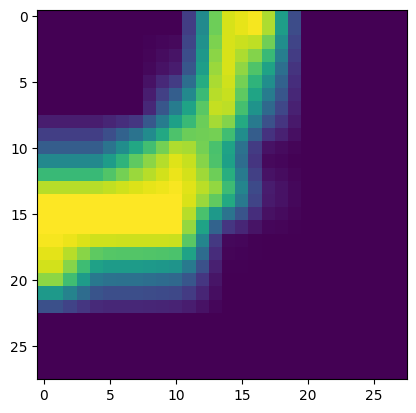

4


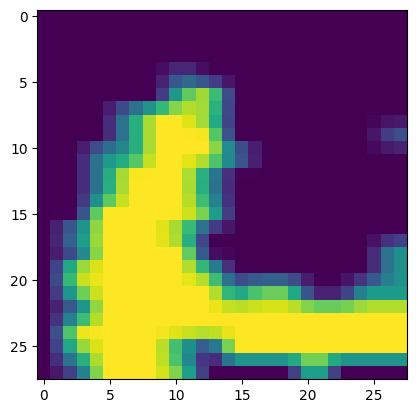

4


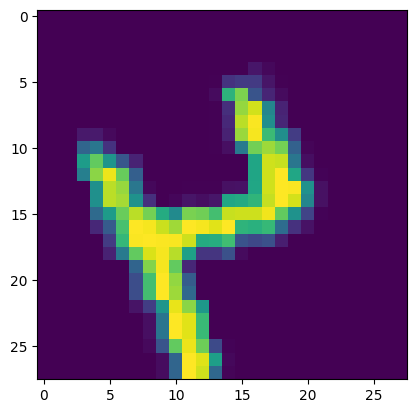

1


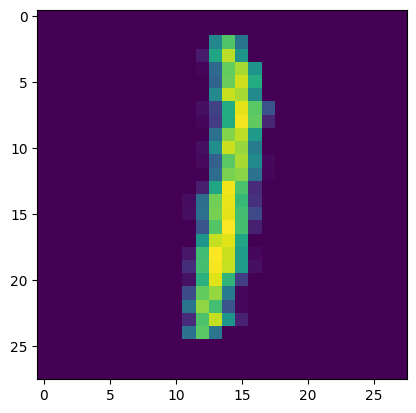

4


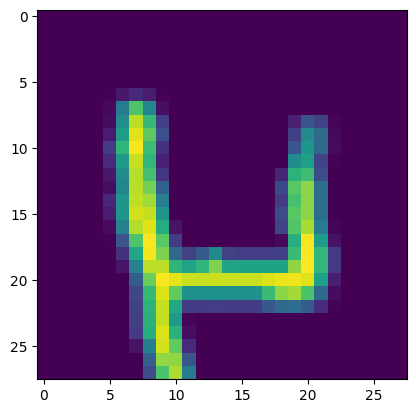

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
## YOUR CODE HERE ##
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
## YOUR CODE HERE ##
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        total_train_samples += labels.size(0)

        # Print loss every 250 batches
        if (i + 1) % 250 == 0:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {loss.item():.5f}')

    train_accuracy = train_correct / total_train_samples
    avg_train_loss = train_loss / len(train_loader)
    print(f'Epoch {epoch + 1} training accuracy: {train_accuracy * 100:.2f}% training loss: {avg_train_loss:.5f}')
    train_loss_history.append(avg_train_loss)

    val_loss = 0.0
    val_correct = 0
    total_val_samples = 0  # Define total_val_samples here
    net.eval()

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
            total_val_samples += labels.size(0)

    val_accuracy = val_correct / total_val_samples
    avg_val_loss = val_loss / len(valid_loader)
    print(f'Epoch {epoch + 1} validation accuracy: {val_accuracy * 100:.2f}% validation loss: {avg_val_loss:.5f}')
    val_loss_history.append(avg_val_loss)


Epoch 1, Batch 250, Loss: 2.08003
Epoch 1, Batch 500, Loss: 1.58552
Epoch 1, Batch 750, Loss: 1.48737
Epoch 1, Batch 1000, Loss: 1.63533
Epoch 1, Batch 1250, Loss: 1.19829
Epoch 1, Batch 1500, Loss: 1.45933
Epoch 1 training accuracy: 44.57% training loss: 1.61439
Epoch 1 validation accuracy: 52.78% validation loss: 1.38941
Epoch 2, Batch 250, Loss: 1.43108
Epoch 2, Batch 500, Loss: 1.41258
Epoch 2, Batch 750, Loss: 1.41446
Epoch 2, Batch 1000, Loss: 0.94364
Epoch 2, Batch 1250, Loss: 0.87312
Epoch 2, Batch 1500, Loss: 1.46322
Epoch 2 training accuracy: 56.35% training loss: 1.28646
Epoch 2 validation accuracy: 58.95% validation loss: 1.21018
Epoch 3, Batch 250, Loss: 1.32157
Epoch 3, Batch 500, Loss: 0.93086
Epoch 3, Batch 750, Loss: 1.36847
Epoch 3, Batch 1000, Loss: 1.04903
Epoch 3, Batch 1250, Loss: 1.42356
Epoch 3, Batch 1500, Loss: 1.11632
Epoch 3 training accuracy: 59.57% training loss: 1.20130
Epoch 3 validation accuracy: 61.52% validation loss: 1.13674
Epoch 4, Batch 250, Loss:

Plot the training loss (and validation loss/accuracy, if recorded).

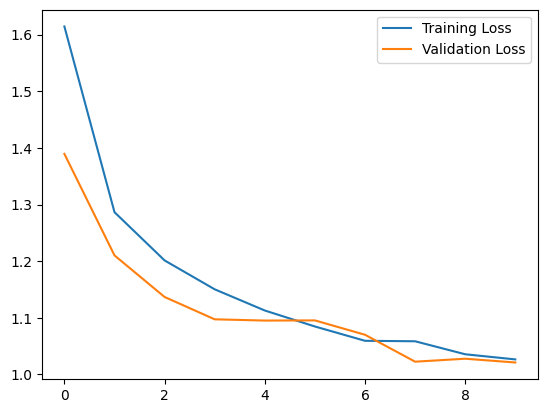

In [11]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = net(images)

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 91.91%


## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
## YOUR CODE HERE ##
torch.save(net,'mnist.pth')